In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import seaborn as sns
import random 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
data = pd.read_csv('dataset.csv')    
data.head()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,...,J791,J792,J793,J794,J795,J796,J797,J798,J799,J800
0,64,40.0,56.0,42.0,57,78.0,30,50.0,55.0,69,...,17,27,77,38.0,24.0,58,74,44,24,35.0
1,60,84.0,82.0,51.0,17,94.0,87,22.0,44.0,35,...,98,35,51,45.0,38.0,47,4,69,24,39.0
2,-32,54.0,18.0,25.0,24,31.0,27,31.0,6.0,21,...,30,16,29,38.0,65.0,69,43,93,88,105.0
3,46,1.0,39.0,63.0,62,44.0,38,32.0,79.0,89,...,92,49,69,74.0,10.0,56,69,6,85,6.0
4,87,68.0,10.0,24.0,9,41.0,84,81.0,90.0,68,...,82,14,94,1.0,3.0,99,38,41,48,44.0


In [3]:
# Change index to machine name (M1, M2, ... M60)
data.index = ['M' + str(i+1) for i in range(0, len(data.index))]
data.head()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,...,J791,J792,J793,J794,J795,J796,J797,J798,J799,J800
M1,64,40.0,56.0,42.0,57,78.0,30,50.0,55.0,69,...,17,27,77,38.0,24.0,58,74,44,24,35.0
M2,60,84.0,82.0,51.0,17,94.0,87,22.0,44.0,35,...,98,35,51,45.0,38.0,47,4,69,24,39.0
M3,-32,54.0,18.0,25.0,24,31.0,27,31.0,6.0,21,...,30,16,29,38.0,65.0,69,43,93,88,105.0
M4,46,1.0,39.0,63.0,62,44.0,38,32.0,79.0,89,...,92,49,69,74.0,10.0,56,69,6,85,6.0
M5,87,68.0,10.0,24.0,9,41.0,84,81.0,90.0,68,...,82,14,94,1.0,3.0,99,38,41,48,44.0


Calculate the total processing time for each job over all machines

In [4]:
# Calculate the total processing time for each job over all machines
sum_processing_time = data.sum(axis=0)
total_time=sum_processing_time
pd_processing_time=pd.DataFrame(columns=['Job', 'Time']) 
pd_processing_time['Job']=data.columns

for i in range(0,800):
    pd_processing_time['Time'][i]=total_time[i]
    pd_processing_time.set_index('Job') # resetting the index  

,Time
Job,
J1,2757
J2,2915
J3,2776
J4,2588
J5,2662
...,...
J796,3518
J797,2885
J798,3604


Observe the outliers

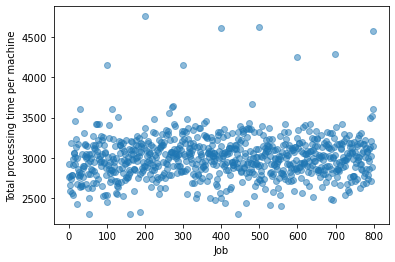

In [7]:
# Observe the outliers from Plot data

# Change columns name
time_df = sum_processing_time.to_frame()
time_df['job'] = time_df.index
time_df.rename(columns = {0:'total_time'}, inplace = True)

# Scatterplot before removing outliers
def scatter(x, y):
    plt.scatter(x, y, alpha = 0.5)
    plt.xticks(np.arange(0, 850, 100), np.arange(0, 850, 100))
    plt.xlabel('Job')
    plt.ylabel('Total processing time per machine')
    plt.show()
    

scatter(time_df['job'], time_df['total_time'])

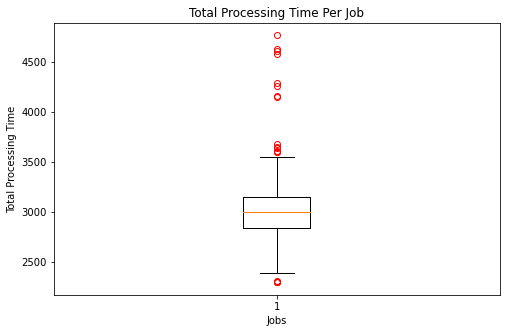

In [9]:
# Observe the outliers from boxplot
fig = plt.figure(1,figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.set_title("Total Processing Time Per Job")
ax.set_xlabel('Jobs')
ax.set_ylabel('Total Processing Time')
bp = ax.boxplot(sum_processing_time, flierprops=dict(markeredgecolor='red'))


Detect outliers

In [10]:
# Detect outliers
# Option 1: 1.5*IQR
def outlier(df_column):
    sorted(df_column)
    Q1,Q3 = np.percentile(df_column, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

lower_range, upper_range = outlier(sum_processing_time)

# Outliers to be removed, according to 1.5*IQR rule
outliers = time_df[(sum_processing_time < lower_range) | (sum_processing_time > upper_range)]
outliers

,total_time,job
J29,3604.0,J29
J55,2300.0,J55
J100,4155.0,J100
J115,3609.0,J115
J162,2301.0,J162
J188,2318.0,J188
J200,4763.0,J200
J272,3636.0,J272
J274,3649.0,J274
J300,4153.0,J300


In [11]:
# Remove the outliers  
outliers_jobs=list(outliers.index)
data.drop(outliers_jobs,axis=1,inplace=True)

Discover the missing values

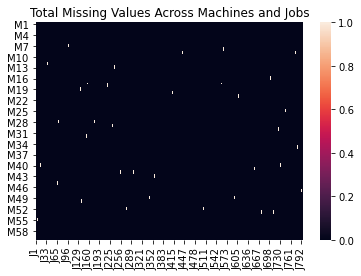

In [12]:
# Observe the missing value with heatmap
def heatmap(data):
    ax = plt.axes()
    ax.set_title("Total Missing Values Across Machines and Jobs")
    plt.xlabel("Job")
    plt.ylabel("Machine")
    return sns.heatmap(data.isnull())
# calling the heatmap function
heatmap(data)


In [13]:
# Handling missing data
def na_check(data):
    print("Is there any missing value in data?:", data.isnull().values.any(),",", data.isnull().sum().sum(),"missing variables")
    if data.isnull().values.any():
        # Check the machines which contain missing values
        df_na_col_list = data[data.isna().any(axis = 1)].index.tolist()
        print("List of machines which contain missing values:\n ", df_na_col_list)
        
na_check(data)


Is there any missing value in data?: True , 112 missing variables
List of machines which contain missing values:
  ['M1', 'M4', 'M6', 'M7', 'M8', 'M9', 'M10', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M47', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M57']


In [14]:
# Replace the missing data with the mean of each job
data = data.fillna(data.mean())
na_check(data)

Is there any missing value in data?: False , 0 missing variables


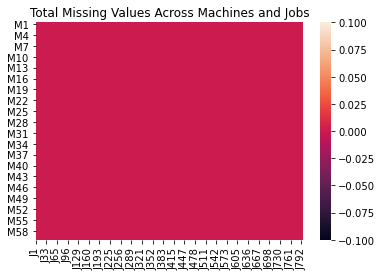

In [15]:
# Check the missing value with heatmap again
heatmap(data)

Other remaining inconsistencies

In [16]:
# Removing remaining inconsistencies
def no_inconsistencies(data):    
    #1. Convert integer to float and round the number for all values in dataset  
    data = data.astype(float).round(2)
    #2. Change all negative value to absolute value
    data = data.abs()
    
    return data

data = no_inconsistencies(data)

In [17]:
# Creating smaller datasets
def data_n(data, n, seed=0):
    new_data = data.sample(n = n, axis = 1, random_state = seed) #random_state acts as random.seed
    return new_data 
    
data_10 = data_n(data, 10, 777)
data_50 = data_n(data, 50, 678)
data_100 = data_n(data, 100, 4567)

# Random Search

In [16]:
# Makespan function in evaluation.py file 
def makespan(s, P):
    C = P[s, :]
    n, m = C.shape
    C[0, :] = np.cumsum(C[0, :])
    C[:, 0] = np.cumsum(C[:, 0])

    for i in range(1, n):
        for j in range(1, m):
            C[i, j] += np.maximum(C[i - 1, j], C[i, j - 1])
    return C[-1, -1]

In [17]:
# Implement random search algorithm
def random_search(data):
    start_time = time.time()
    col_count = len(data.columns)
    max_iterations = col_count*1
    # Giving a largest number 
    best_time = random.getrandbits(128)
    best_seq = []

# Iterate until finding the best sequence
    while max_iterations > 0:
        max_iterations = max_iterations - 1
        P0 = np.transpose(np.array(data))
        s0 = np.random.permutation(col_count)

        new_time = makespan(s0, P0)
        
        if new_time < best_time:
                best_time = new_time
                best_seq = s0
    
    # Calculating the time for the algorithm 
    time_cost = time.time() - start_time
    
    return best_seq, best_time, round(time_cost, 2)

In [ ]:
# Implement descriptive analytics for random search
def descriptive_analytics_random(data):
    random_search_analytics=pd.DataFrame(columns=['seed','sequences','corresponding makespan', 'Time'])
    a=0

# Finding the best sequence for each of the 30 seeds from 0-29
    while a <30:
        np.random.seed(a)
        random_search_analytics.loc[a,'seed']=a
        (best_seq, best_time, time_cost) = random_search(data)
        best_seq=list(best_seq)
        for i, v in enumerate(best_seq):
            best_seq[i] = data.columns[v]

        random_search_analytics.loc[a,'sequences']=best_seq
        random_search_analytics.loc[a,'corresponding makespan']=best_time
        random_search_analytics.loc[a,'Time'] = time_cost
        a += 1
        best_of_all=random_search_analytics['corresponding makespan'].min()

    print("the mean is", 
          random_search_analytics['corresponding makespan'].mean(),"\n","the max is ", 
          random_search_analytics['corresponding makespan'].max(),"\n","the min is ",
          random_search_analytics['corresponding makespan'].min(),"\n","the std is ",
          random_search_analytics['corresponding makespan'].std())
    best_index=random_search_analytics[random_search_analytics['corresponding makespan']==best_of_all].index.values
    print(random_search_analytics.loc[best_index,['sequences']])

    return random_search_analytics

In [ ]:
#These codes are gonna return a dataframe of the best makespans(random_search) for 30 seeds and print its statistics 
descriptive_analytics_random(data_10)
descriptive_analytics_random(data_50)
descriptive_analytics_random(data_100)

# Genetic Algorithm

In [18]:
#a NumPy matrix of shape (number of jobs, number of machines) 
def generate_pop(data,P):
        global Population
        jobs_matrix=np.transpose(np.array(data))
        #first creating a sequence for the data_10 for example =[0,1,2,3,4,5,6,7,8,9] meaning the jobs that are in data_10 in the main order that they appear in the data_10
        s=np.random.permutation(jobs_matrix.shape[0])
        #creating a for loop that runs 30 times in order to create the population
        #This loop permutes s in 30 different times and calculates the makespan for each sequence

        #Initialization of a seed
#         np.random.seed(seed)
        #Now we need to store this information in a dataframe 
        #We create an empty dataframe that we use to store our population in to two columns the sequence and its corresponding makespan
        Population = pd.DataFrame(index=range(0,P), columns=['Sequences','Makespans'])
        for i in range(0,P):    
            #Defining 'a' which is a random permutation of s
            a=np.random.permutation(s)
            #printing the sequence and its corresponding makespan
            #print(a,makespan(a,P10))
            #adding each sequence to the sequence column dataframe
            Population.iloc[i,0]=a
            #adding each makespan to the makespan column dataframe
            Population.iloc[i,1]=makespan(a,jobs_matrix)
        
        return Population

In [19]:
# Creating the function that gives us the description of the population
def Population_statistics(Population):
        return Population['Makespans'].astype(float).describe()

In [20]:
def Parent_Selection(Population,P):
        #Creating the probability distribution for choosing the first parent
        #create an empty list to store the probabilities 
        
        pb=[]
        for i in range(0,P):
            #appending each sequence with its appropriate probability
            pb.append((2*i)/((P-1)*P))
        #Selecting the first parent
        #np.random.seed(seed)
        #random index generated using the probailities above(the fitness distribution provided)
        index_parent_1=np.random.choice(np.arange(0,P),p=pb)
        #getting the sequence of the corresponding index (Parent 1)
        P1=Population.loc[index_parent_1,['Sequences']]
        #assigning the parent_1 to its corresponding sequence in dataframe
        Parent_1 = P1[0]
        #random index generated using the uniform probability
        index_parent_2=np.random.choice(np.arange(0,P))
        #getting the sequence of the corresponding index (Parent 1)
        P2=Population.loc[index_parent_2,['Sequences']]
        #assigning the parent_1 to its corresponding sequence in dataframe
        Parent_2 = P2[0]
        # the function returnn the parents after selecting them from the dataframes with the appropriate distributions
        return Parent_1,Parent_2

In [21]:
# Creating the crossover function that takes the two parents selected by the selection function and the crossover probability as parameters
def crossover(data,Parent_1,Parent_2,Pc,b):
    # b is a certain random decimal between 0 and 1 that is generated to check when the crossover would be done 
    #the crossover requirement
    if b <= Pc:
        # creating an array that chooses randomly(uniform distribution) the possible crossover points (for example we cant have the last index as the second crossover point)
        array=np.random.choice(range(len(data.iloc[0])-2),2,replace=False)

        #sorting the array so that the first index is always lower than the second index
        sorted_array=np.sort(array)
        #assigning the first crossover point to the first(lower) value in the array
        first_crossover_point = sorted_array[0]
        # assigning the second crossover point to the second(higher) value in the array
        second_crossover_point = sorted_array[1]
        ##In this part and to simplify how  two points crossover works we divided each parent into 3 blocks so we can work on each block seperatly


        #block1_1 corresponds to the jobs before the first crossover point in Parent_1
        block1_1 = Parent_1[0:first_crossover_point+1]
        #block2_1 corresponds to the jobs between the two crossover points in Parent_1
        block2_1 = Parent_1[first_crossover_point+1:second_crossover_point+1]
        #block3_1 corresponds to the jobs after the second crossover point in Parent_1
        block3_1 = Parent_1[second_crossover_point+1:]
        #block1_2 corresponds to the jobs before the first crossover point in Parent_2
        block1_2 = Parent_2[0:first_crossover_point+1]
        #block2_2 corresponds to the jobs between the two crossover points in Parent_2
        block2_2 = Parent_2[first_crossover_point+1:second_crossover_point+1]
        #block3_2 corresponds to the jobs after the second crossover point in Parent_2
        block3_2 = Parent_2[second_crossover_point+1:]
        # creating an empty list which will be filled during the crossover  
        #the eggs will turn up to be the childs before the mutaion
        egg_1 = []
        #filling the egg  with what the first block of the first parent
        egg_1.extend(block1_1)
        # for loop that assigns the second block(between the two crossover points) to nan value 
        #This is done so we can fill these nan with the non used jobs
        for _ in range(0, len(block2_1)):
            egg_1.append(np.nan)
        # for loop that flips the 3rd block of the 2nd parent into the child 
        # this for loop also checks if the jobs already exists in the first block and assigns nan to them if they are
        for i in block3_2:
            if i not in block1_1:
                egg_1.append(i)
            # checking for illegitimate swapping
            else:
                egg_1.append(np.nan)
        # creating an illegitimate  array which is the jobs that are not present in the egg sequence (remaining jobs to be filled)
        illegitimate_array = []
        #for loop that fills this illegitemate array
        for i in range(0,len(data.iloc[0])):
            if i not in egg_1:
                illegitimate_array.append(i)
        # shuffling the array randomly
        np.random.shuffle(illegitimate_array)

        egg_1 = np.array(egg_1)
        #filling the nan values with the illegitimate  array values
        egg_1[np.isnan(egg_1)] = illegitimate_array
        egg_1=egg_1.astype(int)
        # The same process is done for the second egg 
        egg_2 = []
        #filling with the first block of 2nd parent
        egg_2.extend(block1_2)
        #assiging the 2nd block of the egg to nan value
        for _ in range(0, len(block2_2)):
            egg_2.append(np.nan)
        #filling the 3rd block of the 2nd egg the same way that it is done for the first
        for i in block3_1:
            if i not in block1_2:
                egg_2.append(i)
            else:
                egg_2.append(np.nan)
        # creating an illegitimate  array which is the jobs that are not present in the 2nd  egg sequence (remaining jobs to be filled)
        illegitimate_array = []
        #filling the illegitimate  array 
        for i in range(0,len(data.iloc[0])):
            if i not in egg_2:
                illegitimate_array.append(i)
        #shuffling the array randomly
        np.random.shuffle(illegitimate_array)
        egg_2 = np.array(egg_2)
        #filling the nan values with the values in the illegitimate  array
        egg_2[np.isnan(egg_2)] = illegitimate_array
        egg_2=egg_2.astype(int)

# return egg_1,egg_2
    # if crossover doesnt happen then the eggs will become the parents and then mutation will happen
    else:
        egg_1= Parent_1, egg_2=Parent_2
    return egg_1,egg_2

In [22]:
# Creating the mutation function
# Mutation exchange mutation, simple exchange of two elements choosen at random

def mutation(data,egg_1,egg_2,Pm,D,b):
        
    array=np.random.choice(range(len(data.iloc[0])),2,replace=False)
    sorted_array=np.sort(array)
    first_index = sorted_array[0]
    second_index = sorted_array[1]

    if b<=Pm:
        egg_1[second_index],egg_1[first_index]=egg_1[first_index],egg_1[second_index]
        egg_2[second_index],egg_2[first_index]=egg_2[first_index],egg_2[second_index]

    child_1=egg_1
    child_2=egg_2
    
    return child_1,child_2


In [23]:
# Function replacing the old sequence (unfit member) with the children

def replace(data,Population,child_1,child_2):
    
        jobs_matrix=np.transpose(np.array(data))
        #Replacing the old sequence(unfit member ) with the childs
        if makespan(child_1,jobs_matrix)<= makespan(Population.iloc[0,0],jobs_matrix):
            Population.iloc[0,0]=child_1
            Population.iloc[0,1]=makespan(child_1,jobs_matrix)
            if makespan(child_2,jobs_matrix)<= makespan(Population.iloc[1,0],jobs_matrix):
                Population.iloc[1,0]=child_2
                Population.iloc[1,1]=makespan(child_2,jobs_matrix)

        
        elif makespan(child_2,jobs_matrix)<= makespan(Population.iloc[0,0],jobs_matrix):
            Population.iloc[0,0]=child_2
            Population.iloc[0,1]=makespan(child_2,jobs_matrix)

Genetic Algorithm Function

In [24]:
# GA(data_50, 0)`
import time
def GA(data,seed,P,Pc,Pm,D):
    omega=0.99
    #Creating the population
    #run 10000
    jobs_matrix=np.transpose(np.array(data))
    start_time=time.time()
    np.random.seed(seed)
    Population=generate_pop(data,P)
    for i in range(1000*data.shape[1]):
        b=random.random()
        random.seed(i)
        Population.sort_values(by='Makespans',ascending=False,inplace=True,ignore_index=True)
#         Population.index=range(1,P+1) 
        Parent_1,Parent_2=Parent_Selection(Population,P)
        egg_1, egg_2 = crossover(data,Parent_1, Parent_2,Pc,b)
        child_1, child_2 = mutation(data,egg_1, egg_2,Pm,D,b)
        replace(data,Population,child_1,child_2)
        Pm_temp=Pm
        if b <= Pm:
            Pm=Pm*omega
        
        
        Vmin=Population['Makespans'].min()
        Vmean=Population['Makespans'].mean()
        if  Vmin/Vmean > D:
             Pm =Pm_temp 
        
        Population.sort_values(by='Makespans',ascending=False,inplace=True,ignore_index=True)
#         Population.index=range(1,P+1)
    last_statistics=Population['Makespans'].astype(float).describe()
    best_sequence=Population.iloc[-1,0]
    best_makespan=Population.iloc[-1,1]
    finish_time=time.time()
    best_sequence=list(best_sequence)
    for i,v in enumerate(best_sequence):
        best_sequence[i]=data.columns[v]
    best_sequence=np.array(best_sequence)
    Time_of_alg=finish_time-start_time
    
    
    

    
    return best_sequence,best_makespan,last_statistics,Time_of_alg

In [25]:
# Function to find out descriptive statistics for the genetic algorithm

def descriptive_analytics_GA(data,P,Pc,Pm,D):
    
    data_statistics=pd.DataFrame(columns=['seed','best sequences','corresponding makespan','Time'])
    a=0
    while a <30:
        (best_sequences, best_makespan,last_statistics,Time_for_alg)=GA(data,a,P,Pc,Pm,D)
        data_statistics.loc[a,'seed']=a
        data_statistics.loc[a,'best sequences']=(np.array2string(best_sequences,separator=','))
        data_statistics.loc[a,'corresponding makespan']=best_makespan
        data_statistics.loc[a,'Time']=Time_for_alg
        a += 1
   
    print(data_statistics['corresponding makespan'].astype(float).describe())
    print(data_statistics['Time'].sum())
    print("Results for GA with", "Dataset:",len(data.columns) , "\nPopulation size: ", P , "\nCrossover probability ", Pc, "\nMutation probability ", Pm , "\nReset factor D ", D)
    return data_statistics

In [26]:
# Function to create excel sheets so when we split the code for each member to run individually it will  save time and recollect the data from each member(rather than doing it on one ＰＣ)

def analytic(method, data, P=30, Pc=1, Pm=0.8, D=0.95):
    if method == "GA":
        if type(P) == list:
            for i in P:
                output_data = descriptive_analytics_GA(data, i, Pc, Pm, D)
                folder = "data_{}_P".format(len(data.columns))
                filename = "GA_{}_P_{}".format(len(data.columns), i)
                output_data.to_excel( "./data/{}/{}.xlsx".format(folder ,filename),
                                      sheet_name= "P_{}".format(i))
        elif type(Pc) == list:
            for i in Pc:
                output_data = descriptive_analytics_GA(data, P, i, Pm, D)
                folder = "data_{}_Pc".format(len(data.columns))
                filename = "GA_{}_Pc_{}".format(len(data.columns), i)
                output_data.to_excel( "../data/{}/{}.xlsx".format(folder,filename),
                                       sheet_name= "Pc_{}".format(i))
        elif type(Pm) == list:
            for i in Pm:
                output_data = descriptive_analytics_GA(data, P, Pc, i, D)
                folder = "data_{}_Pm".format(len(data.columns))
                filename = "GA_{}_Pm_{}".format(len(data.columns), i)
                output_data.to_excel( "../data/{}/{}.xlsx".format(folder,filename),
                                      sheet_name= "Pm_{}".format(i))
        else:
            output_data = descriptive_analytics_GA(data, P, Pc, Pm, D)
            folder = "data_{}_default".format(len(data.columns))
            filename = "GA_{}".format(len(data.columns))
            output_data.to_excel( "./data/{}/{}.xlsx".format(folder,filename),
                                 sheet_name="Default")
            

    elif method == "RS":
        output_data = descriptive_analytics_random(data)
        filename = "RS_{}".format(len(data.columns))
        output_data.to_excel( "../Data/{}.xlsx".format(filename),sheet_name= "e04Group")
                
        

In [ ]:
# Import back the excel results after running the code separately to visualize results
def data_collection(method, data, P=30, Pm=0.8, Pc=1):
    
    if method == "GA":
        #Creating an empty list that will be filled with the results of different paramters
        pd_list = []
        
        if type(P) == list:
            for i in P:
                file_name = "GA_{}_P_{}.xlsx".format(len(data.columns), i)
                file = pd.read_excel(file_name)
                pd_list.append(file)
                
        elif type(Pc) == list:
            for i in Pc:
                file_name = "GA_{}_Pc_{}.xlsx".format(len(data.columns), i)
                file = pd.read_excel(file_name)
                pd_list.append(file)
                
        elif type(Pm) == list:
            for i in Pm:
                file_name = "GA_{}_Pm_{}.xlsx".format(len(data.columns), i)
                file = pd.read_excel(file_name)
                pd_list.append(file)  
        else:
            file_name = "GA_{}_default.xlsx".format(len(data.columns))
            file = pd.read_excel(file_name)
            return file
                
        return pd_list
    
    else:
        # if the method is GA
        rs = pd.read_excel("RS_{}_default.xlsx".format(len(data.columns)))
        return rs


In [ ]:
# Running the algorithm and get analytics from here
analytic(method="GA",data=data_10,Pc=[0,0.7,0.9])
analytic(method="GA",data=data_10,P=[10, 50, 100])
analytic(method="GA",data=data_10,Pm=[0.05, 0.6, 0.8])

analytic(method="GA",data=data_50,Pc=[0, 0.7, 0.9])
analytic(method="GA",data=data_50,P=[10, 50, 100])
analytic(method="GA",data=data_50,Pm=[0.05, 0.6, 0.8])

analytic(method="GA",data=data_100,Pm=[0.05, 0.6, 0.8])
analytic(method="GA",data=data_100,P=[10, 50, 100])
analytic(method="GA",data=data_100,Pc=[0, 0.7, 0.9])

In [ ]:
# Analysis for default parameters: P=30 pm=0.8 pc=1 D=0.95

analytic(method="GA", data=data_10)
analytic(method="GA", data=data_50)
analytic(method="GA", data=data_100)

analytic(method="RS", data=data_10) 
analytic(method="RS", data=data_50)
analytic(method="RS", data=data_100)

In [ ]:
# Get the data from excel files and stored in local variables
P_list_10 = data_collection(method="GA",data=data_10, P=[10, 50, 100])
Pc_list_10 = data_collection(method="GA",data=data_10, Pc=[0, 0.7, 0.9])
Pm_list_10 = data_collection(method="GA",data=data_10, Pm=[0.05, 0.6, 0.8])

P_list_50 = data_collection(method="GA",data=data_50,P=[10,50,100])
Pm_list_50 = data_collection(method="GA",data=data_50, Pm=[0.05, 0.6, 0.8])
Pc_list_50 = data_collection(method="GA",data=data_50, Pc=[0, 0.7, 0.9])

P_list_100 = data_collection(method="GA",data=data_100,P=[10,50,100])
Pc_list_100 = data_collection(method="GA", data=data_100, Pc=[0, 0.7, 0.9])
Pm_list_100 = data_collection(method="GA", data=data_100, Pm=[0.05, 0.6, 0.8])

GA_10 = data_collection(method="GA", data=data_10)
GA_50 = data_collection(method="GA", data=data_50)
GA_100 = data_collection(method="GA", data=data_100)

RS_10 = data_collection(method="RS", data=data_10)
RS_50 = data_collection(method="RS", data=data_50)
RS_100 = data_collection(method="RS", data=data_100)

In [183]:
# this function will crate different boxplot comparing the different possible scenarios.
def boxplot(change_par, P, P_list, data, yMin, yMax):
    df_comparison= pd.concat([P_list[0]['corresponding makespan'].rename('{}={}'.format(change_par,P[0] )),
                           P_list[1]['corresponding makespan'].rename('{}={}'.format(change_par, P[1])),
                           P_list[2]['corresponding makespan'].rename('{}={}'.format(change_par, P[2]))],
                           axis=1)
    ax = plt.axes()    
    axes = df_comparison.boxplot(color=dict( medians='r'),showfliers=False, grid=False,return_type='axes')  
    axes.set_ylim(yMin, yMax)
    ax.set_title("")

In [184]:
P_list_10 = data_collection(data=data_10, P=[10, 50, 100])
Pc_list_10 = data_collection(data=data_10, Pc=[0, 0.7, 0.9])
Pm_list_10 = data_collection(data=data_10, Pm=[0.05, 0.6, 0.8])
P_list_50=data_collection(data_50,P=[10,50,100])
Pm_list_50 = data_collection(data=data_50, Pm=[0.05, 0.6, 0.8])
Pc_list_50 = data_collection(data=data_50, Pc=[0, 0.7, 0.9])
P_list_100=data_collection(data_100,P=[10,50,100])
Pc_list_100 = data_collection(data=data_100, Pc=[0, 0.7, 0.9])
Pm_list_100 = data_collection(data=data_100, Pm=[0.05, 0.6, 0.8])

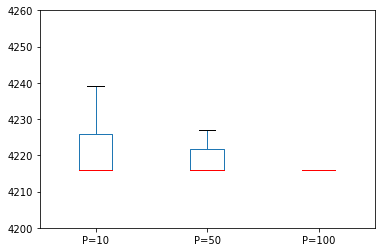

In [189]:
boxplot("P", [10, 50, 100], P_list_10,data_10,4200, 4260)

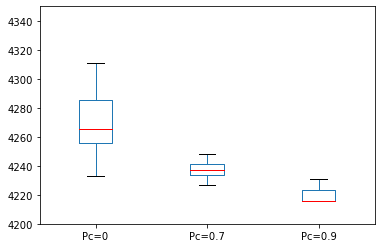

In [193]:
boxplot("Pc", [0, 0.7, 0.9], Pc_list_10, data_10,4200, 4350)

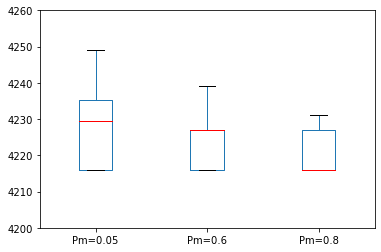

In [191]:
boxplot("Pm", [0.05, 0.6, 0.8], Pm_list_10,data_10,4200, 4260)

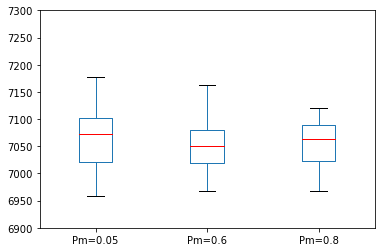

In [195]:
boxplot("Pm", [0.05, 0.6, 0.8], Pm_list_50,data_50,6900, 7300)

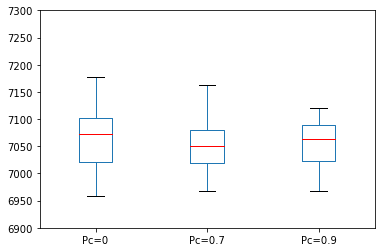

In [197]:
boxplot("Pc", [0, 0.7, 0.9], Pm_list_50,data_50,6900, 7300)

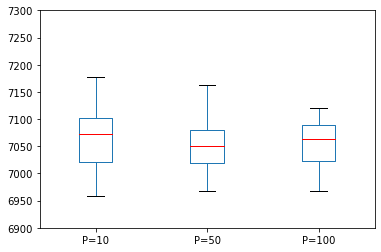

In [198]:
boxplot("P", [10, 50, 100], Pm_list_50,data_50,6900, 7300)

In [288]:
# T-Test
import scipy

scipy.stats.ttest_ind(a=np.array(Pm_list_10[0]['corresponding makespan']),
                      b=np.array(Pm_list_10[2]['corresponding makespan']))


Ttest_indResult(statistic=3.158829859285994, pvalue=0.002515640627463451)

In [301]:
columns = ['P=10', 'P=50', 'P=100']
df_time = pd.DataFrame()
for i, v in enumerate(P_list_10):
    df_time[str(columns[i])] = v['Time'].round(2)
df_time

,P=10,P=50,P=100
0,90.09,96.87,134.19
1,89.67,117.42,114.34
2,88.89,104.70,122.80
3,80.42,82.84,119.26
4,77.87,75.73,128.80
5,97.10,102.77,120.86
6,91.21,89.71,100.09
7,90.33,74.39,101.72
8,118.26,68.57,95.86
9,109.75,68.55,96.51
